In [1]:
import pandas as pd
import numpy as np
import re
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pickle

sns.set_style("darkgrid")
nlp = spacy.load("en_core_web_trf")

In [35]:
artist_name = 'eminem'

In [36]:
lyrics_df = pd.read_csv(f'data/lyrics_{artist_name}.csv', index_col=0)
print('Number of songs out of the albums:', len(lyrics_df[lyrics_df.album_info.isna()]))
lyrics_df.album_info.fillna('other', inplace=True)
display(lyrics_df.album_info.value_counts())

Number of songs out of the albums: 98


other                                               98
album: "The Marshall Mathers LP" (2000)             24
album: "Encore" (2004)                              24
album: "The Eminem Show" (2002)                     23
album: "Slim Shady LP" (1999)                       23
album: "The Marshall Mathers LP 2" (2013)           22
album: "Relapse" (2009)                             22
album: "Music To Be Murdered By" (2020)             20
album: "Revival" (2017)                             19
album: "Recovery" (2010)                            19
album: "Music To Be Murdered By - Side B" (2020)    16
album: "Kamikaze" (2018)                            13
EP: "Straight From The Vault" (2011)                11
album: "Infinite" (1996)                            11
EP: "Slim Shady EP" (1998)                          11
compilation: "Eminem Presents The Re-Up" (2006)      9
EP: "Straight From The Lab" (2003)                   9
compilation: "Shady XV" (2014)                       7
compilatio

In [37]:
lyrics_df['release_type'] = ''
lyrics_df['release_year'] = ''

for i in lyrics_df[lyrics_df.album_info!='other'].index:
    album_info = lyrics_df.album_info[i]
    lyrics_df.loc[i, 'release_type'] = album_info.split(': ')[0]
    lyrics_df.loc[i, 'release_year'] = int(album_info.split('" (')[1].replace(')', ''))
    
display(lyrics_df.head(3))

lyrics_df.shape

,album_info,album_title,lyrics,song_title,song_detail,release_type,release_year
0,"album: ""Infinite"" (1996)","""Infinite""","\n\r\nAw, yeah (It's like this, like this)\nIt...",Infinite,NaN,album,1996
1,"album: ""Infinite"" (1996)","""Infinite""","\n\r\nYeah, soul intent, checking in number on...",W.E.G.O. (Interlude),(feat. Proof & DJ Head),album,1996
2,"album: ""Infinite"" (1996)","""Infinite""",\n\r\nCheck it out\nHey Kyu!\n\nIt's a broke d...,It's Ok,(feat. Eye-Kyu),album,1996


(396, 7)

## Tokenization

Run this part if you want don't tokenize the data yet or want to update as it may take long time

In [5]:
%%time
lyrics_df['tokens'] = lyrics_df.lyrics.map(tokenize_text)

CPU times: user 8min 11s, sys: 3.15 s, total: 8min 14s
Wall time: 2min 34s


In [6]:
save_data(lyrics_df.tokens.values, f'data/tokens_{artist_name}.pkl')

## Loading of the tokenized lyrics

In [38]:
tokens = load_data(f'data/tokens_{artist_name}.pkl')
lyrics_df['tokens'] = tokens

In [39]:
lyrics_df['n_words'] = lyrics_df.tokens.map(len)
lyrics_df['unique_tokens'] = lyrics_df.tokens.map(np.unique)
lyrics_df['n_unique_words'] = lyrics_df.unique_tokens.map(len)
lyrics_df.head(2)

,album_info,album_title,lyrics,song_title,song_detail,release_type,release_year,tokens,n_words,unique_tokens,n_unique_words
0,"album: ""Infinite"" (1996)","""Infinite""","\n\r\nAw, yeah (It's like this, like this)\nIt...",Infinite,NaN,album,1996,"[aw, yeah, like, like, eminem, baby, motherfuc...",330,"['cause, 'em, 313, 95, 96, act, action, ai, an...",238
1,"album: ""Infinite"" (1996)","""Infinite""","\n\r\nYeah, soul intent, checking in number on...",W.E.G.O. (Interlude),(feat. Proof & DJ Head),album,1996,"[yeah, soul, intent, check, number, baby, week...",33,"[313, alright, ay, baby, call, check, checkin,...",30


Drop the intros

In [40]:
lyrics_df = lyrics_df[lyrics_df.n_words>0]


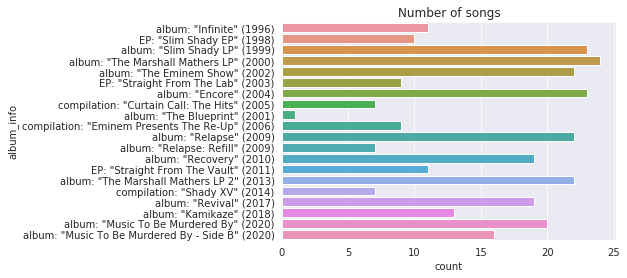

In [41]:
sns.countplot(y='album_info', data=lyrics_df[lyrics_df.album_info!='other'])
plt.title('Number of songs')
plt.show()

In [42]:
word_counter = get_word_counter(lyrics_df.tokens)
print(len(word_counter), 'unique words')


12792 unique words


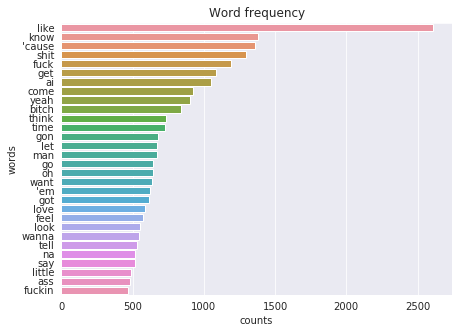

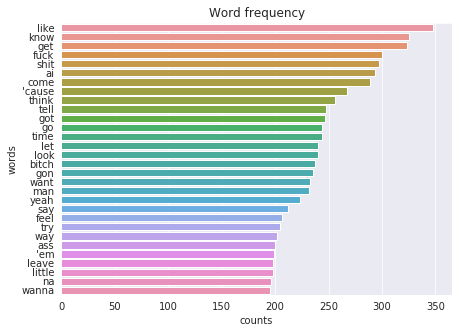

In [43]:
plot_common_words(word_counter)

unique_word_counter = get_word_counter(lyrics_df.unique_tokens.values)

plot_common_words(unique_word_counter)

In [44]:
import random
rare_words = [key for key in word_counter if word_counter[key] < 2]
print(len(rare_words), 'words are used ones')
print('Examples:')
print(random.sample(rare_words, 10))


5721 words are used ones
Examples:
['sockin', 'krypton', 'smilin', 'context', 'slapstick', 'shriek', 'hawaii', 'authenticity', 'preparin', 'afterbirth']


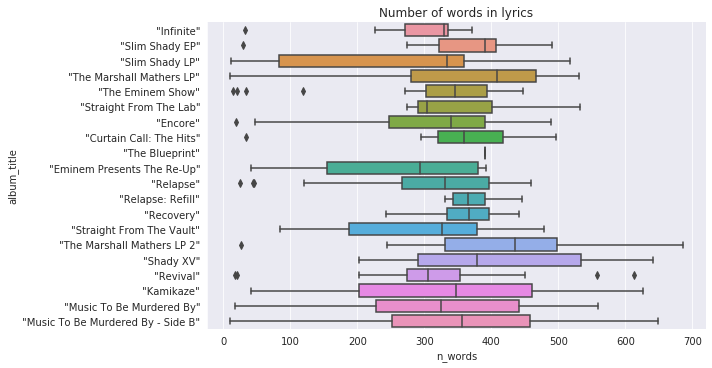

In [45]:
order = lyrics_df.album_title.dropna().unique()

sns.catplot(y="album_title", x="n_words", kind="box", data=lyrics_df, aspect=2, order=order)
plt.title('Number of words in lyrics')
plt.show()

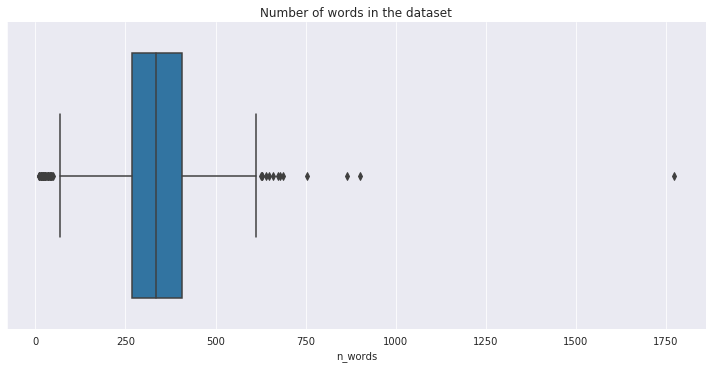

In [46]:
sns.catplot(x="n_words", kind="box", data=lyrics_df, aspect=2, order=order)
plt.title('Number of words in the dataset')
plt.show()

In [47]:
df = lyrics_df[lyrics_df.n_words<50]
print(df.sample(3).lyrics.values)

["\n\n[Zoe on telephone]\nJustin? \nIt's Zoe um \nKelly did not have me call however I just listened to Eminem in her car and \nIt is the most disgusting, thing I have ever heard in my entire life \nAnd I seriously wanna call his fucking agent \nAnd tell him how fucking disgusting he is \nIt like makes me upset\nI'm now nauseous and I can't eat lunch\nGoodbye\n"
 '\n\n[Slim Shady:]\n"Eminem"\n\n[Eminem:]\n"No"\n\n[Slim Shady:]\n"Eminem"\n\n[Eminem:]\n"No"\n\n[Slim Shady:]\n"Wake the fuck up motherfucker"\n\n[Eminem:]\n"What do you want from me?"\n\n[Slim Shady:]\n"Remember me"\n\n[Eminem:]\n"I killed you!"\n\n[Slim Shady:]\n"You thought I was dead, didn\'t you"\n\n[Eminem:]\n"What do you want from me?!"\n\n[Slim Shady:]\n"I\'m alive!"\n\n[Eminem:]\n"Oh God!"\n\n[Slim Shady:]\n"Get up"\n\n[Eminem:]\n"No"\n\n[Slim Shady:]\n"Get up and look in the mirror!"\n\n[Eminem:]\n"I don\'t want to"\n\n[Slim Shady:]\n"Look in the mirror it\'s just a reflection"\n\n[Eminem:]\n"Leave me alone!"\n\n[Sl

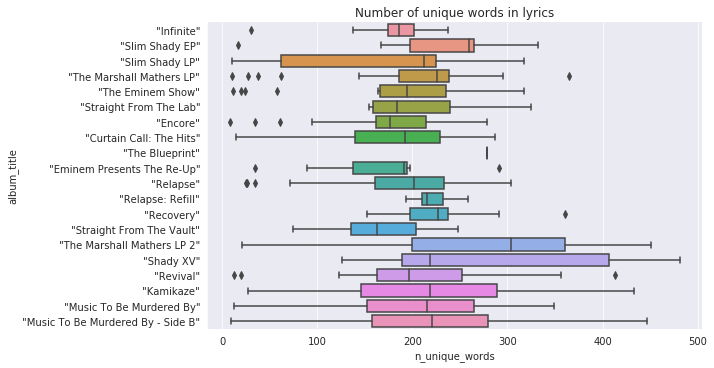

In [48]:
sns.catplot(y="album_title", x="n_unique_words", kind="box", data=lyrics_df, aspect=2, order=order)
plt.title('Number of unique words in lyrics')
plt.show()

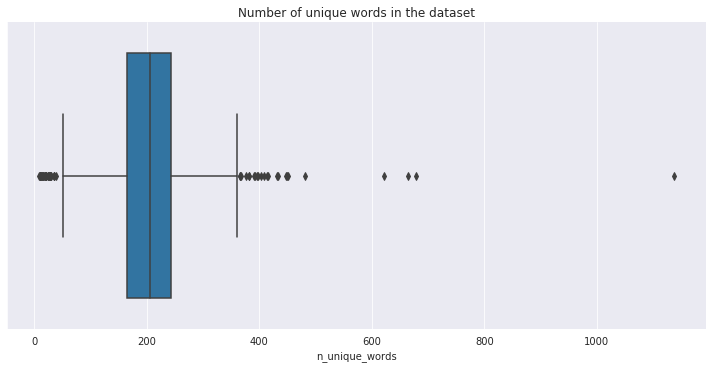

In [49]:
sns.catplot(x="n_unique_words", kind="box", data=lyrics_df, aspect=2, order=order)
plt.title('Number of unique words in the dataset')
plt.show()

In [17]:
print('Average number of words:',lyrics_df.n_words.mean())
print('Average number of unique words:',lyrics_df.n_unique_words.mean())

Average number of words: 333.1882951653944
Average number of unique words: 209.4325699745547


In [19]:
df = lyrics_df.groupby('album_title').mean()
df['n_songs'] = lyrics_df.groupby('album_title').size()
display(df)


,n_words,n_unique_words,n_songs
album_title,,,
"""Curtain Call: The Hits""",338.428571,175.857143,7
"""Eminem Presents The Re-Up""",260.888889,167.222222,9
"""Encore""",305.739130,173.913043,23
"""Infinite""",289.727273,175.454545,11
"""Kamikaze""",348.615385,231.692308,13
"""Music To Be Murdered By - Side B""",330.312500,209.625000,16
"""Music To Be Murdered By""",312.200000,201.850000,20
"""Recovery""",361.736842,224.368421,19
"""Relapse""",298.000000,179.363636,22


In [20]:
albums_features = []
for year, df in lyrics_df.groupby('release_year'):
#     display(df)
    for name, df_album in df.groupby('album_title'):
        print('Release:', year, name)
        print('Number of songs:', len(df_album))
        word_counter = get_word_counter(df_album.tokens.values)
        albums_features.append({
            'n_unique_words':  len(list(word_counter.elements())),
            'n_songs': len(df_album)
        })
#         print('Unique words:', len(list(word_counter.elements())))
#         print('Average number of words', df_album.n_words.mean())
#         print('Average number of unique words', df_album.n_unique_words.mean())
#         print()


Release: 1996 "Infinite"
Number of songs: 11
Release: 1998 "Slim Shady EP"
Number of songs: 10
Release: 1999 "Slim Shady LP"
Number of songs: 23
Release: 2000 "The Marshall Mathers LP"
Number of songs: 24
Release: 2001 "The Blueprint"
Number of songs: 1
Release: 2002 "The Eminem Show"
Number of songs: 22
Release: 2003 "Straight From The Lab"
Number of songs: 9
Release: 2004 "Encore"
Number of songs: 23
Release: 2005 "Curtain Call: The Hits"
Number of songs: 7
Release: 2006 "Eminem Presents The Re-Up"
Number of songs: 9
Release: 2009 "Relapse"
Number of songs: 22
Release: 2009 "Relapse: Refill"
Number of songs: 7
Release: 2010 "Recovery"
Number of songs: 19
Release: 2011 "Straight From The Vault"
Number of songs: 11
Release: 2013 "The Marshall Mathers LP 2"
Number of songs: 22
Release: 2014 "Shady XV"
Number of songs: 7
Release: 2017 "Revival"
Number of songs: 19
Release: 2018 "Kamikaze"
Number of songs: 13
Release: 2020 "Music To Be Murdered By - Side B"
Number of songs: 16
Release: 20

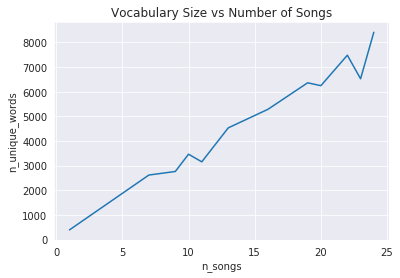

In [21]:
df = pd.DataFrame(albums_features)
sns.lineplot(data=df, x='n_songs', y='n_unique_words', ci=None)
plt.title('Vocabulary Size vs Number of Songs')
plt.show()